<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/10-neural-networks/02_neural_network_nonlinear_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The nonlinear boundary of a neural network

In this notebook, we’ll train a neural network in Keras on the dataset that contains two labels, 0 and 1. The points with label 0 are drawn as squares, and those with label 1 are drawn as triangles. 

Notice that the points with label 1 are located mostly at the center,
whereas the points with label 0 are located on the sides. 

For this type of dataset, we need a classifier with a nonlinear boundary, which makes it a good example for a neural network.

Neural networks are great for **nonlinearly separable sets**. 

To test this, we’ll train a neural network on this circular dataset.

##Setup

In [ ]:
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_10_Neural_Networks/utils.py
!wget https://github.com/luisguiserrano/manning/raw/master/Chapter_10_Neural_Networks/one_circle.csv

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import utils

import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
# Setting random seeds to get reproducible results
np.random.seed(0)
tf.random.set_seed(1)

##Dataset

Before we train the model, let’s look at some random rows in our data.

In [4]:
# Loading the one_circle dataset
dataset = pd.read_csv("one_circle.csv", index_col=0)

X = np.array(dataset[["x_1", "x_2"]])
y = np.array(dataset["y"]).astype(int)

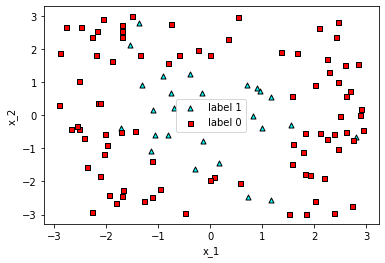

In [7]:
# let's plot the data points
utils.plot_points(X, y)

In [8]:
dataset.head(10)

,x_1,x_2,y
0,-0.759416,2.753240,0
1,-1.885278,1.629527,0
2,2.463302,-1.023869,0
3,-1.986004,-0.898810,0
4,2.010834,-2.580117,0
5,2.410188,2.370501,0
6,1.599140,-0.862732,0
7,-1.109856,-2.469697,0
8,2.447342,2.811180,0
9,-1.697732,2.539848,0


In [9]:
X[:10]

array([[-0.759416  ,  2.7532401 ],
       [-1.8852779 ,  1.62952654],
       [ 2.46330243, -1.02386888],
       [-1.98600415, -0.89880979],
       [ 2.01083403, -2.58011745],
       [ 2.41018752,  2.37050087],
       [ 1.59914005, -0.86273162],
       [-1.10985644, -2.46969746],
       [ 2.4473419 ,  2.81117994],
       [-1.69773161,  2.53984757]])

In [10]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Before we build and train the neural networks, we must do some data preprocessing.

In this dataset, the output is a number between 0 and 1, but it represents two classes. 

In Keras, it is recommended to categorize this type of output. 

This simply means that points with label 0 will
now have a label `[1,0]`, and points with label 1 will now have a label `[0,1]`.

In [12]:
y = np.array(to_categorical(y, 2))
y[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

##Neural network architecture

In [14]:
# Building the model
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(2, )))
model.add(Dropout(.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(.2))
model.add(Dense(2, activation="softmax"))

# Compiling the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 8,770
Trainable params: 8,770
Non-trainable params: 0
_________________________________________________________________


##Training the neural network

Let's train the model.

In [15]:
model.fit(X, y, epochs=100, batch_size=10)

Epoch 1/100
11/11 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7182
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.7636
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.7636
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.7636
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.7636
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.7636
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.7636
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.7636
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.7636
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.7636
Epoch 11/

The final accuracy of the model on the training is 0.9.

Let's plot the boundary of of the neural network.

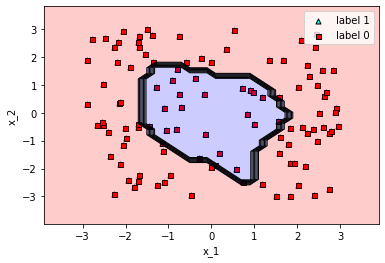

In [16]:
utils.plot_model(X, y, model)

Note that the model managed to classify the data pretty well, encircling the triangles and leaving the squares outside. 

It made some mistakes, due to noisy data, but this is OK. 

The rigged boundary hints to small levels of overfitting, but in general it seems like a good model.